### Problem Statement

Predict the price of backpacks given various attributes.

### Data collection

data collected from https://www.kaggle.com/competitions/playground-series-s5e2/data?select=train.csv


In [1]:
## importing libraries

import numpy as np
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
### Reading data

def read_data(path):
    data = pd.read_csv(path)
    return data

def drop_columns(data, columns):
    data.drop(columns=columns, axis=1, inplace=True)

train_data = read_data('./data/train.csv')
test_data = read_data('./data/test.csv')

### first 5 rows of dataset
train_data.head()

,id,Brand,Material,Size,Compartments,Laptop Compartment,Waterproof,Style,Color,Weight Capacity (kg),Price
0,0,Jansport,Leather,Medium,7.0,Yes,No,Tote,Black,11.611723,112.15875
1,1,Jansport,Canvas,Small,10.0,Yes,Yes,Messenger,Green,27.078537,68.88056
2,2,Under Armour,Leather,Small,2.0,Yes,No,Messenger,Red,16.643760,39.17320
3,3,Nike,Nylon,Small,8.0,Yes,No,Messenger,Green,12.937220,80.60793
4,4,Adidas,Canvas,Medium,1.0,Yes,Yes,Messenger,Green,17.749338,86.02312


### Data Analysis

In [3]:
def analyze_data(data):
    
    print("DataFrame Info:")
    print("=================================")
    display(data.info())
    print("\n")
    
    print("DataFrame Values:")
    print("=================================")
    display(data.head())
    print("\n")
    
    print("DataFrame Desscription")
    print("=================================")
    display(data.describe())
    print("\n")
    
    print("Number of null values")
    print("=================================")
    display(data.isnull().sum())
    print("\n")
    
    print("Number of duplicated values")
    print("==================================")
    display(data.duplicated().sum())
    print("\n")
    
    print("Number of unique values")
    print("==================================")
    display(data.nunique())
    print("\n")
    
    print("Dataframe Shape")
    print("===================================")
    print(f"Rows: {data.shape[0]}, Columns: {data.shape[1]}")
    print("\n")

    print("categorical variable")
    print("===================================")
    print([col for col in data.columns if data[col].dtype == 'O'])
    print("\n")
    print("numerical variable")
    print("===================================")
    print([col for col in data.columns if data[col].dtype != 'O'])

analyze_data(train_data)

DataFrame Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300000 entries, 0 to 299999
Data columns (total 11 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   id                    300000 non-null  int64  
 1   Brand                 290295 non-null  object 
 2   Material              291653 non-null  object 
 3   Size                  293405 non-null  object 
 4   Compartments          300000 non-null  float64
 5   Laptop Compartment    292556 non-null  object 
 6   Waterproof            292950 non-null  object 
 7   Style                 292030 non-null  object 
 8   Color                 290050 non-null  object 
 9   Weight Capacity (kg)  299862 non-null  float64
 10  Price                 300000 non-null  float64
dtypes: float64(3), int64(1), object(7)
memory usage: 25.2+ MB


None



DataFrame Values:


,id,Brand,Material,Size,Compartments,Laptop Compartment,Waterproof,Style,Color,Weight Capacity (kg),Price
0,0,Jansport,Leather,Medium,7.0,Yes,No,Tote,Black,11.611723,112.15875
1,1,Jansport,Canvas,Small,10.0,Yes,Yes,Messenger,Green,27.078537,68.88056
2,2,Under Armour,Leather,Small,2.0,Yes,No,Messenger,Red,16.643760,39.17320
3,3,Nike,Nylon,Small,8.0,Yes,No,Messenger,Green,12.937220,80.60793
4,4,Adidas,Canvas,Medium,1.0,Yes,Yes,Messenger,Green,17.749338,86.02312




DataFrame Desscription


,id,Compartments,Weight Capacity (kg),Price
count,300000.000000,300000.000000,299862.000000,300000.000000
mean,149999.500000,5.443590,18.029994,81.411107
std,86602.684716,2.890766,6.966914,39.039340
min,0.000000,1.000000,5.000000,15.000000
25%,74999.750000,3.000000,12.097867,47.384620
50%,149999.500000,5.000000,18.068614,80.956120
75%,224999.250000,8.000000,24.002375,115.018160
max,299999.000000,10.000000,30.000000,150.000000




Number of null values


id                         0
Brand                   9705
Material                8347
Size                    6595
Compartments               0
Laptop Compartment      7444
Waterproof              7050
Style                   7970
Color                   9950
Weight Capacity (kg)     138
Price                      0
dtype: int64



Number of duplicated values


0



Number of unique values


id                      300000
Brand                        5
Material                     4
Size                         3
Compartments                10
Laptop Compartment           2
Waterproof                   2
Style                        3
Color                        6
Weight Capacity (kg)    181596
Price                    48212
dtype: int64



Dataframe Shape
Rows: 300000, Columns: 11


categorical variable
['Brand', 'Material', 'Size', 'Laptop Compartment', 'Waterproof', 'Style', 'Color']


numerical variable
['id', 'Compartments', 'Weight Capacity (kg)', 'Price']


#### Data checks

* Check missing values - missing values present in dataset
* Check duplicates - No duplicate values present in dataset
* Check data types - All data types are correct

In [4]:
### dropping id column 

drop_columns(train_data, 'id')
drop_columns(test_data, 'id')

In [5]:
## categorical and numerical variable 

cat_var = [col for col in train_data.columns if train_data[col].dtype == 'O']
num_var = [col for col in train_data.columns if train_data[col].dtype != 'O']

In [6]:
def plot_categories(data, columns):
    for col in columns:
        print(f"count of categories in {col} column")
        sns.countplot(data[col])
        plt.show()
        print("\n")

count of categories in Brand column


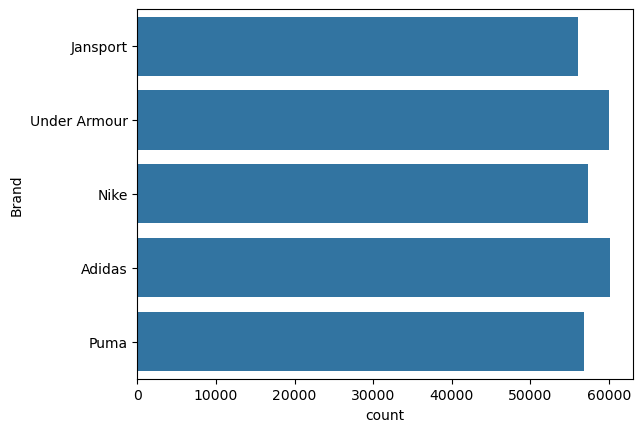



count of categories in Material column


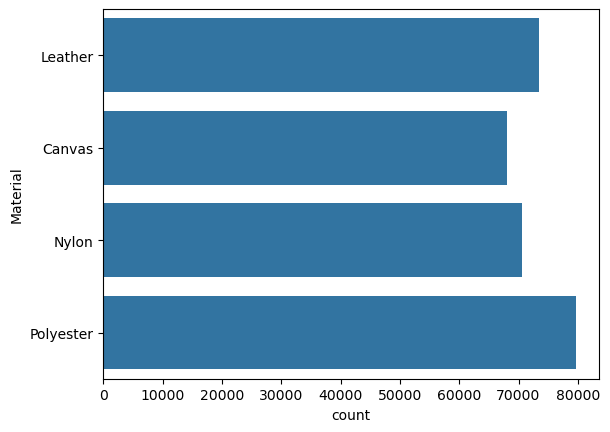



count of categories in Size column


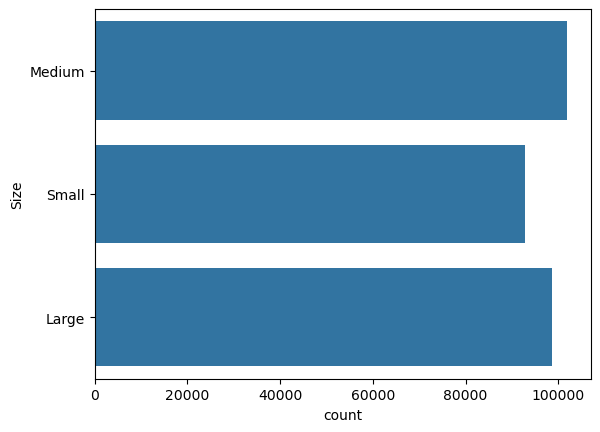



count of categories in Laptop Compartment column


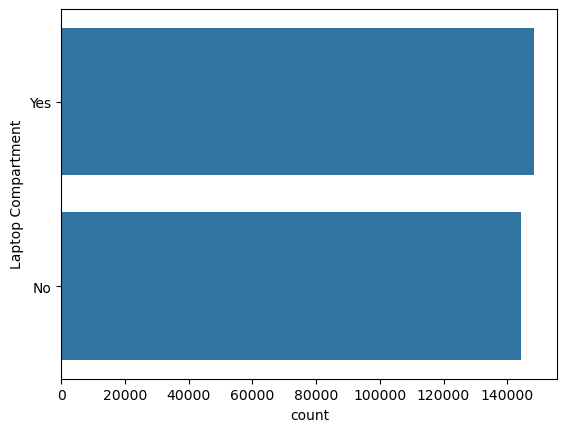



count of categories in Waterproof column


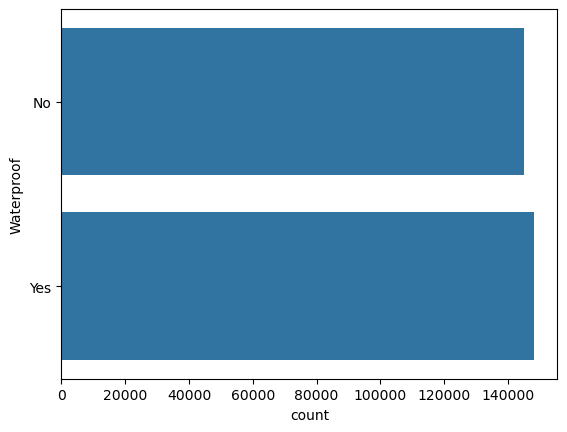



count of categories in Style column


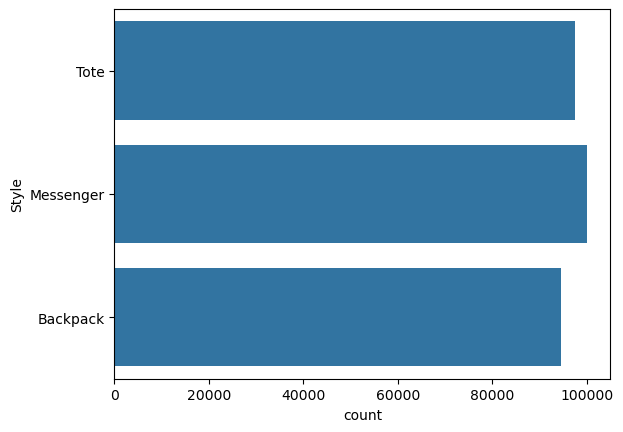



count of categories in Color column


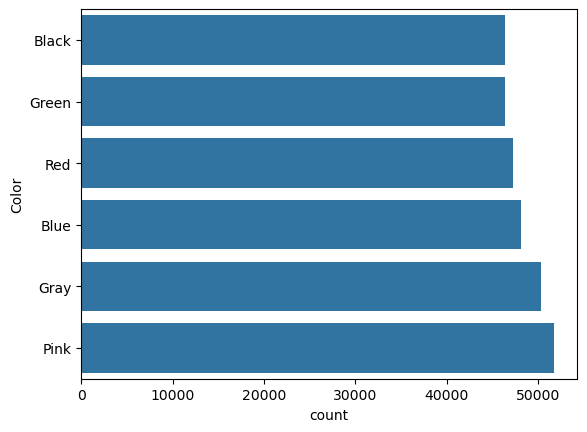

In [7]:
plot_categories(train_data, cat_var)

In [16]:
def plot_num_vars(data, columns):
    for col in columns:
        sns.histplot(data, x=col, bins=30, palette='Blues')
        plt.show()

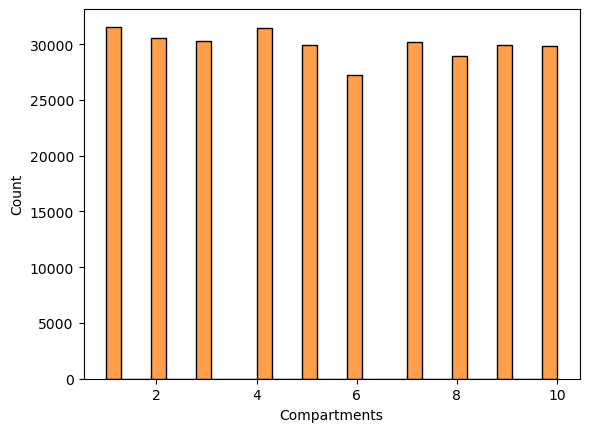

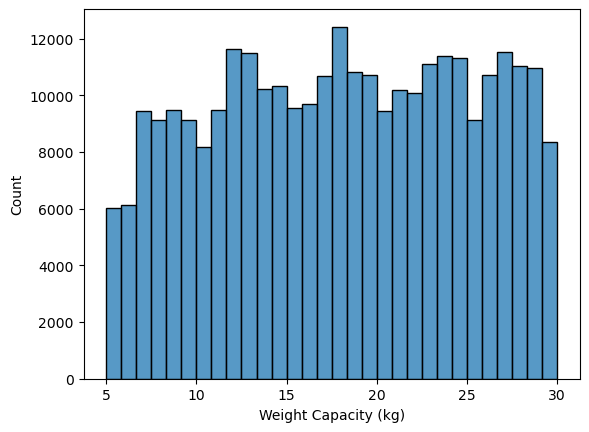

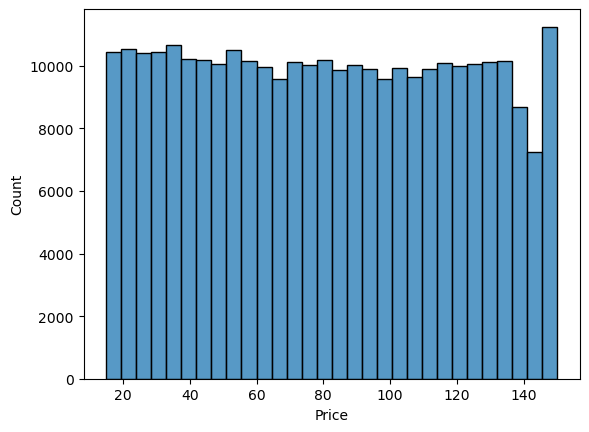

In [17]:
plot_num_vars(train_data, num_var)

From the count graph, we can see that there is no much difference in count of categories of different features. We will use most frequent value for categorical features.

From histogram plot, we can see that the plot is not symmetrical for the features so we can use median value to replace the missing values. There is no much difference between mean and median value for both the features but still we will go ahead with median value.

In [21]:
### categorical variables effect on numerical variables

def plot_eff(data, columns):
    for col in columns:
        grp = data[[col]+num_var].groupby(col).mean()
        grp.plot(kind='barh',fig=(10,10))
        plt.legend(bbox_to_anchor=(1.05,1),loc=2,borderaxespad=0.)
        plt.show()